<a href="https://colab.research.google.com/github/Tom-Jung/ML_Colab/blob/main/4_stocks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/soham2707/Stock-Market-Analysis-And-Forecasting-Using-Deep-Learning/master/GOOGL_2006-01-01_to_2018-01-01.csv'
google = pd.read_csv(url)
google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [3]:
url = 'https://raw.githubusercontent.com/soham2707/Stock-Market-Analysis-And-Forecasting-Using-Deep-Learning/master/AMZN_2006-01-01_to_2018-01-01.csv'
amazon = pd.read_csv(url)
amazon.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [4]:
url = 'https://raw.githubusercontent.com/soham2707/Stock-Market-Analysis-And-Forecasting-Using-Deep-Learning/master/IBM_2006-01-01_to_2018-01-01.csv'
ibm = pd.read_csv(url)
ibm.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [5]:
url = 'https://raw.githubusercontent.com/soham2707/Stock-Market-Analysis-And-Forecasting-Using-Deep-Learning/master/MSFT_2006-01-01_to_2018-01-01.csv'
microsoft = pd.read_csv(url)
microsoft.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


In [6]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [7]:
google.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [9]:
google.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [17]:
fig = px.histogram(google,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of close')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(google,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of Open')
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
fig = px.scatter(google,
                 x='Open',
                 y='Close',
                 
                 opacity=0.7,
                 
                 title='Open vs. Close')

fig.update_traces(marker_size=5)
fig.show()

In [22]:
google.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999894,0.999841,0.999742,-0.443155
High,0.999894,1.000000,0.999827,0.999866,-0.440717
Low,0.999841,0.999827,1.000000,0.999896,-0.447781
Close,0.999742,0.999866,0.999896,1.000000,-0.444590
Volume,-0.443155,-0.440717,-0.447781,-0.444590,1.000000


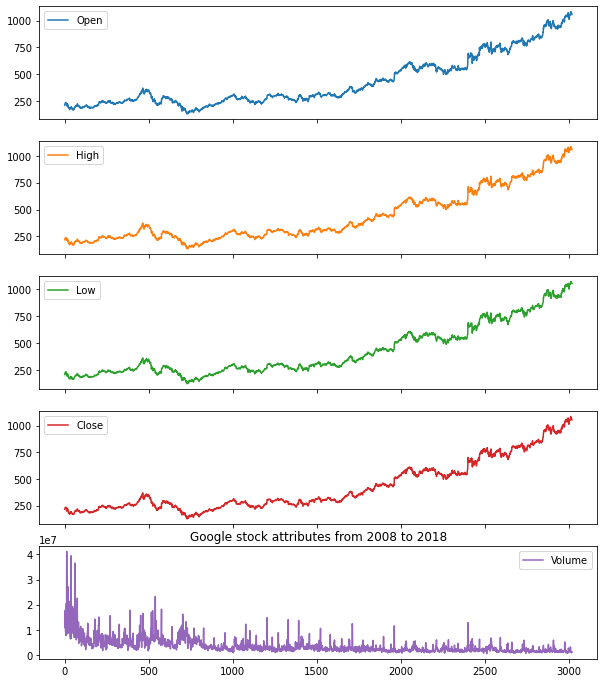

In [25]:
google.plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

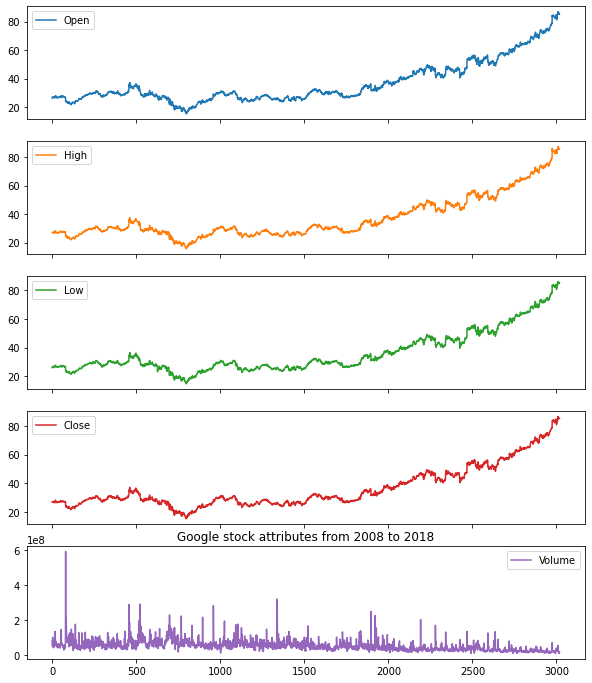

In [26]:
microsoft.plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

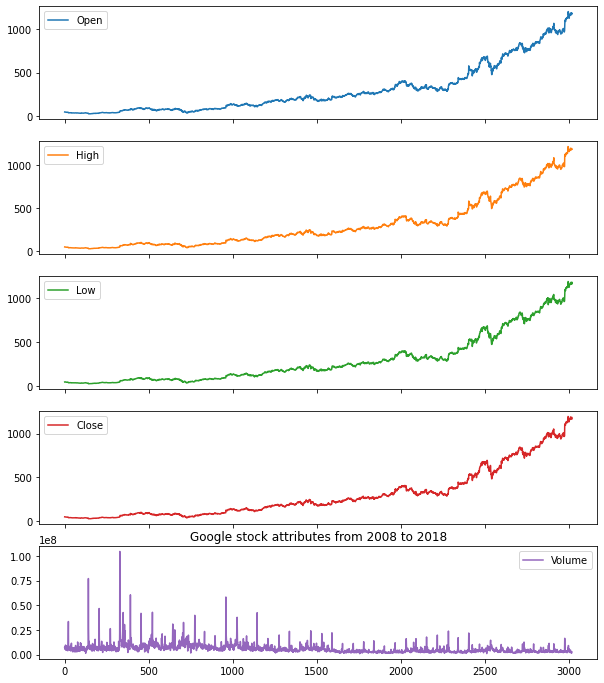

In [27]:
amazon.plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

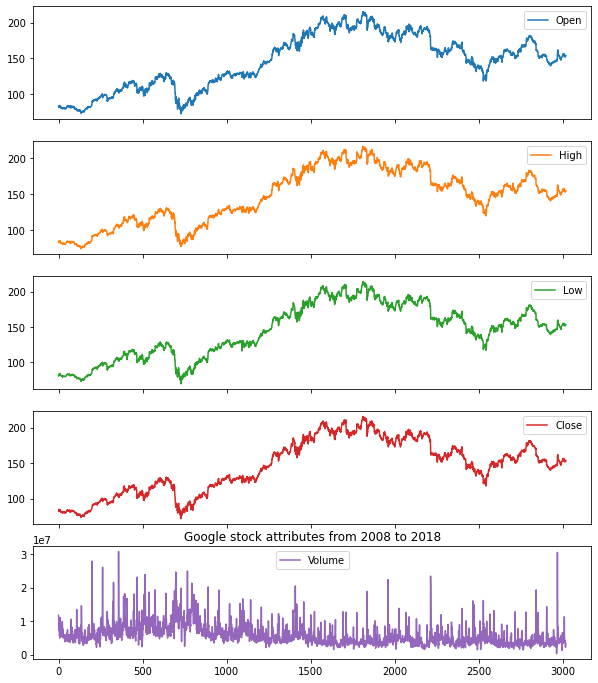

In [28]:
ibm.plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

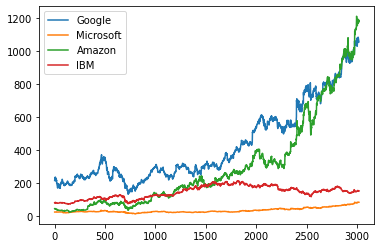

In [41]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM',])
plt.show()

As we can see here Microsoft's "High" value is very slowly increasing straight line. IBM's "High" value and Amazon's "High" value started from the approx same stage, even Amazon's "High" value was a bit lower but after 2012 Amazon's "High" value started to exponentially increase and slight drop for IBM's "High" value. Since 2016 there is a high fight going between Google's "High" value and Amazon's "High" value at 2018 Amazon's "High" value also beat Google's "High" value.

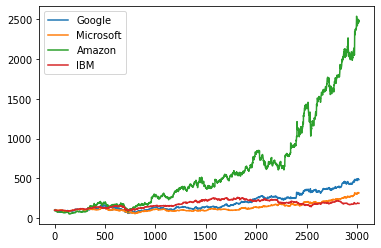

In [43]:
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_amazon = amazon.High.div(amazon.High.iloc[0]).mul(100)
normalized_ibm = ibm.High.div(ibm.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
normalized_amazon.plot()
normalized_ibm.plot()
plt.legend(['Google','Microsoft','Amazon','IBM',])
plt.show()

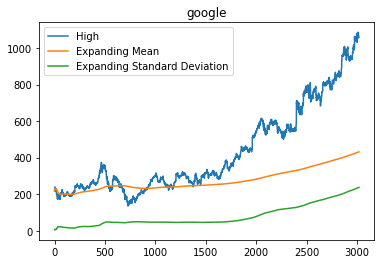

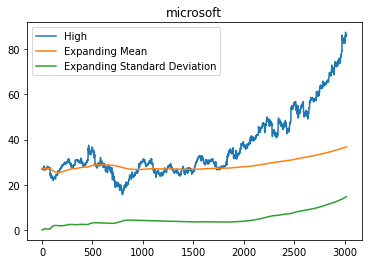

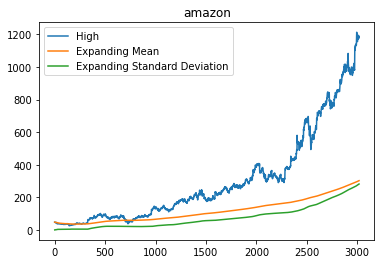

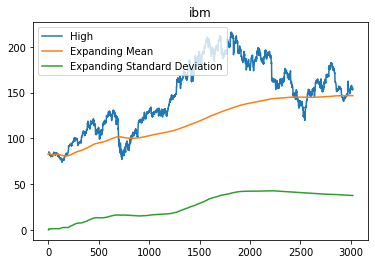

In [74]:
# Expanding window functions

names =[google, microsoft, amazon, ibm]
nnames =['google', 'microsoft', 'amazon', 'ibm']

for idx, name in enumerate(names):
  # print(name)
  name_mean=name.High.expanding().mean()
  name_std=name.High.expanding().std()
  name.High.plot()
  name_mean.plot()
  name_std.plot()
  plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
  plt.title(nnames[idx])
  plt.show()

In [76]:
from pylab import rcParams
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



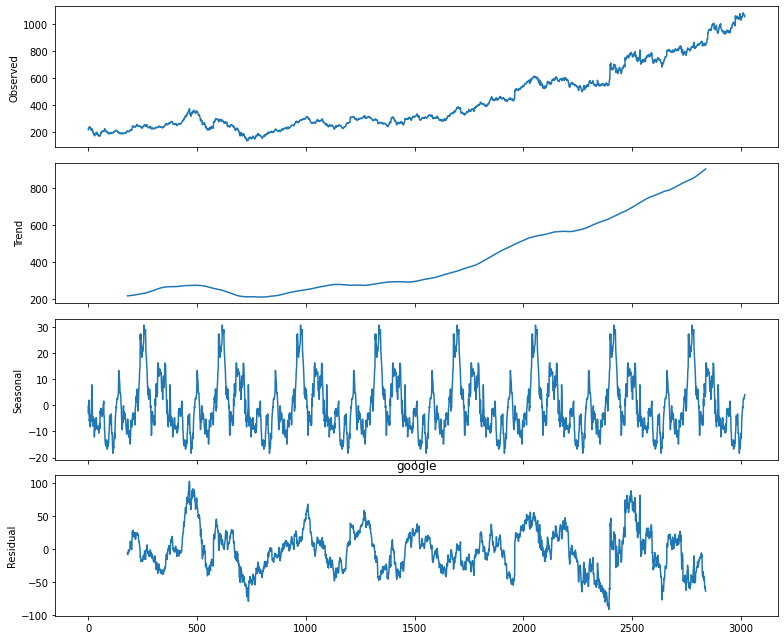

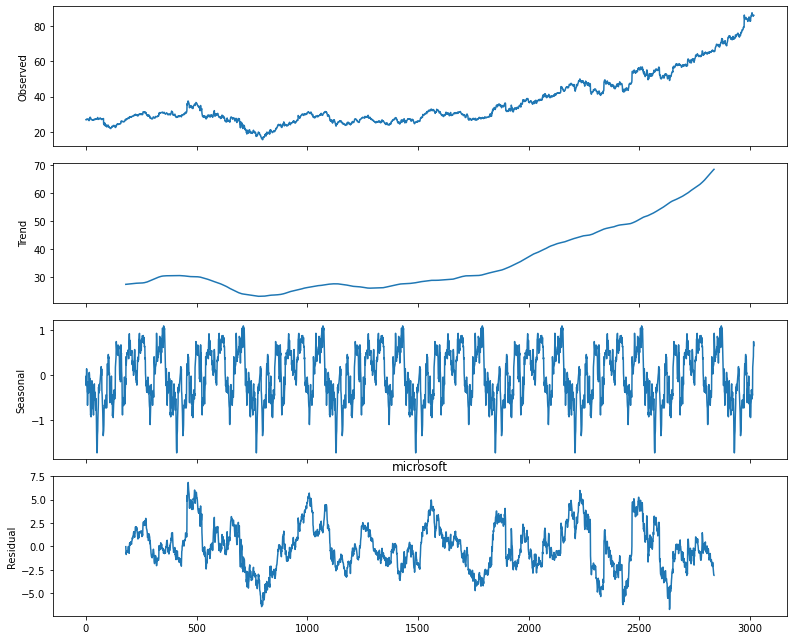

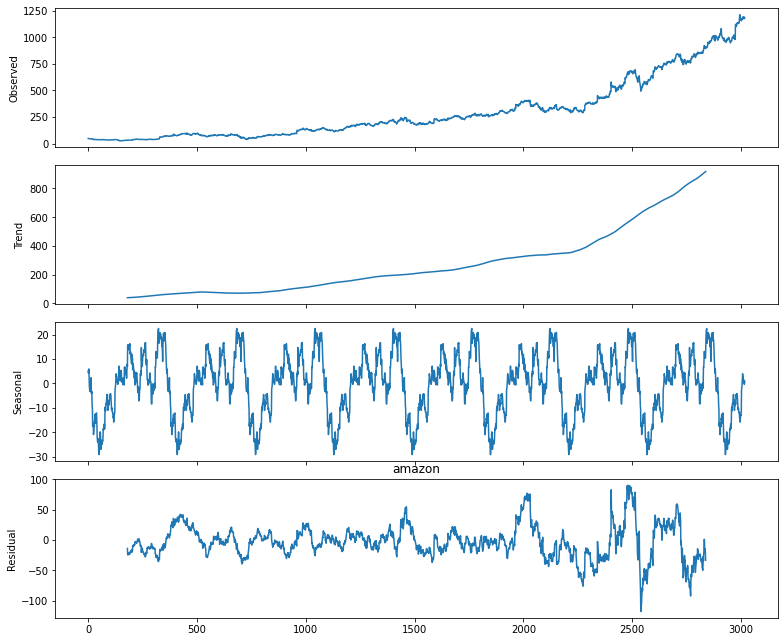

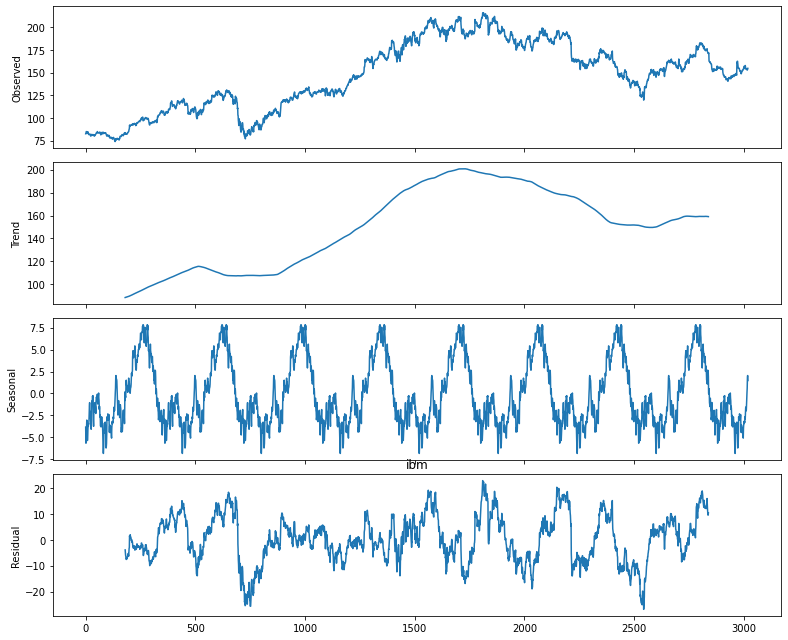

In [86]:
# Now, for decomposition

names =[google, microsoft, amazon, ibm]
nnames =['google', 'microsoft', 'amazon', 'ibm']


for idx, name in enumerate(names):
  # print(nnmaes.[dx])
   rcParams['figure.figsize'] = 11,9
   decomposed = sm.tsa.seasonal_decompose(name["High"], freq=360) # freqency is annual
   figure = decomposed.plot()
   plt.title(nnames[idx])
   plt.show()

Because there have a very strong correlation between Close and High, we can see the trend and seasonality is very similar.

Prediction
Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.

GRU Model:
Gated recurrent unit is essentially a simplified LSTM. It has the exact same role in the network. The main difference is in the number of gates and weights — GRU is somewhat simpler. It has 2 gates. Since it does not have an output gate, there is no control over the memory content. The update gate controls the information flow from the previous activation, and the addition of new information as well, while the reset gate is inserted into the candidate activation.



In [ ]:
data_google=google
data_google=google

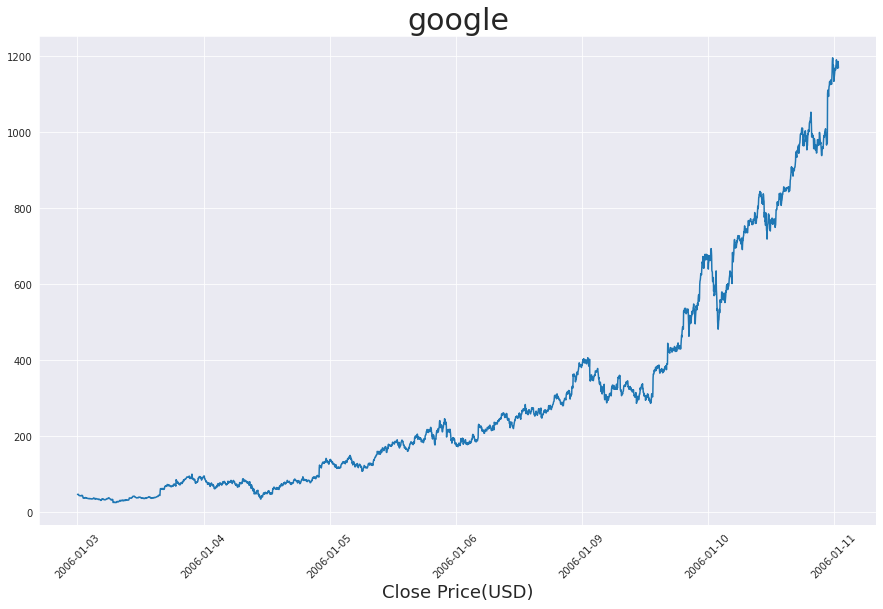

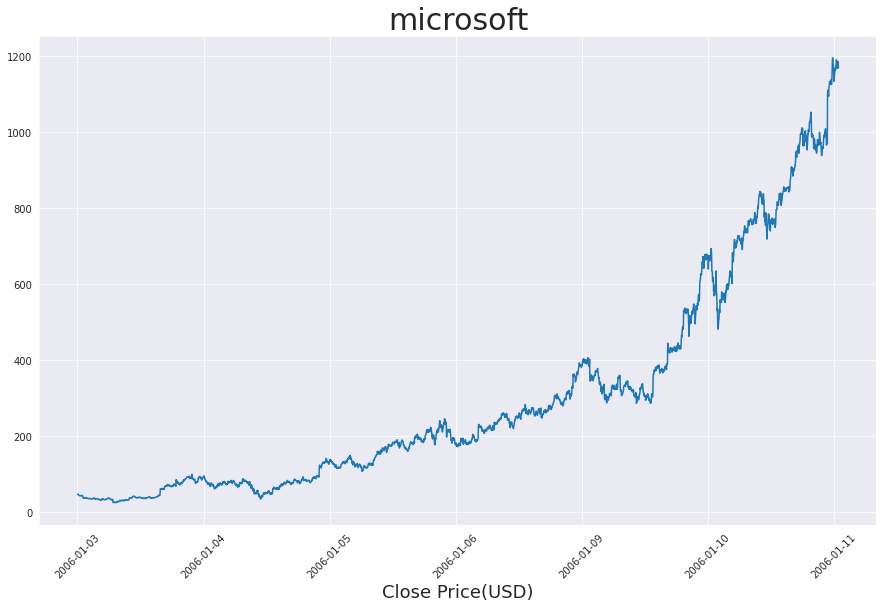

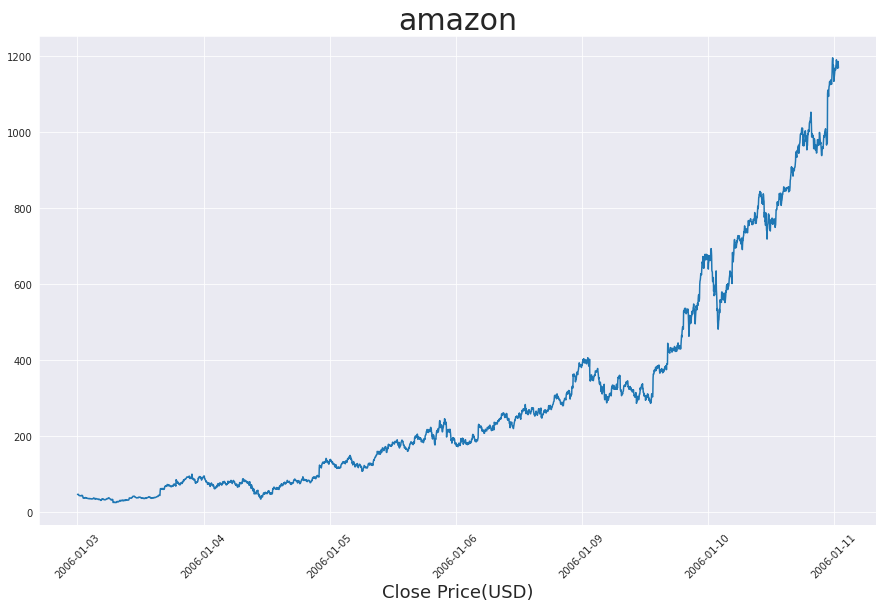

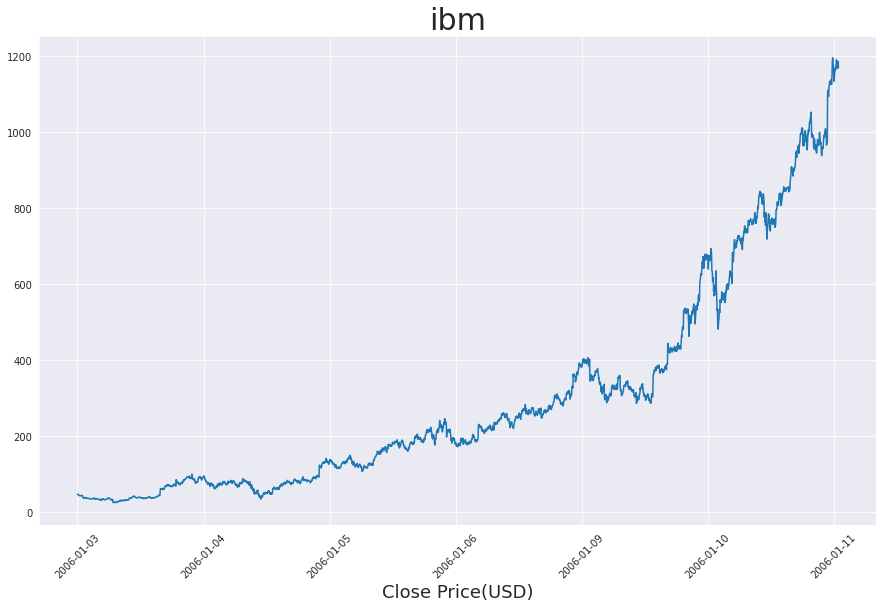

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


names =[google, microsoft, amazon, ibm]
nnames =['google', 'microsoft', 'amazon', 'ibm']

for idx, name in enumerate(names):

      sns.set_style("darkgrid")
      plt.figure(figsize=(15,9))
      plt.plot(amazon[['Close']])
      plt.xticks(range(0,name.shape[0],500), name['Date'].loc[:500], rotation=45)
      plt.xlabel('Date', fontsize=18)
      plt.xlabel('Close Price(USD)', fontsize=18)
      plt.title(nnames[idx], fontsize=30)
      plt.show()

In [94]:
price_amazon = amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [97]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [98]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [99]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [100]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [101]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [103]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.6774278879165649
Epoch  1 MSE:  0.22801938652992249
Epoch  2 MSE:  0.024259053170681
Epoch  3 MSE:  0.20237509906291962
Epoch  4 MSE:  0.09288287162780762
Epoch  5 MSE:  0.023987051099538803
Epoch  6 MSE:  0.05683571845293045
Epoch  7 MSE:  0.08905693888664246
Epoch  8 MSE:  0.08303419500589371
Epoch  9 MSE:  0.0563451312482357
Epoch  10 MSE:  0.03148334100842476
Epoch  11 MSE:  0.02172350510954857
Epoch  12 MSE:  0.027738194912672043
Epoch  13 MSE:  0.03913499042391777
Epoch  14 MSE:  0.04360458627343178
Epoch  15 MSE:  0.0376911424100399
Epoch  16 MSE:  0.02727508917450905
Epoch  17 MSE:  0.01983361691236496
Epoch  18 MSE:  0.018530627712607384
Epoch  19 MSE:  0.02171585150063038
Epoch  20 MSE:  0.025557691231369972
Epoch  21 MSE:  0.02685275860130787
Epoch  22 MSE:  0.02454867959022522
Epoch  23 MSE:  0.01982065476477146
Epoch  24 MSE:  0.015133430249989033
Epoch  25 MSE:  0.012777356430888176
Epoch  26 MSE:  0.01339672040194273
Epoch  27 MSE:  0.015371989458799362


In [104]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

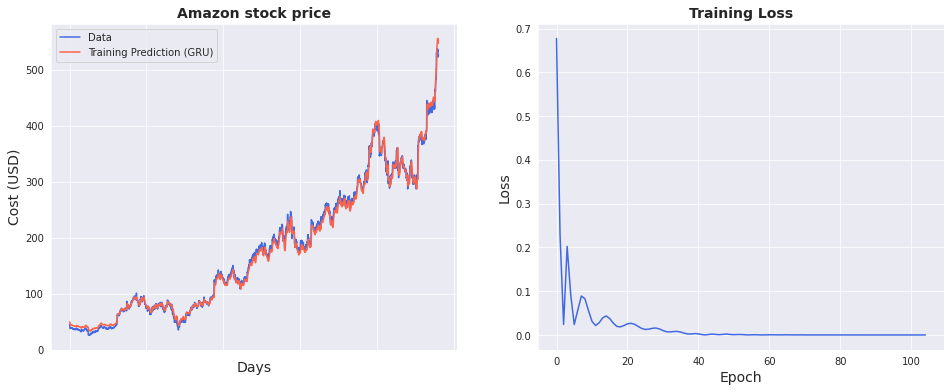

In [105]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)